# Coop Case Study - Complementary and Substitute Products

## Complementary and Substitute Products

## Preprocessing

In [4]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error as mse 
from sklearn.neural_network import MLPRegressor
from apyori import apriori ## Importing apriori package
#from mlxtend.frequent_patterns import apriori, association_rules

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (22, 14),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

#### Import functions from ./Functions_Forecasting AR file in this same folder, look for comments on the functions in that notebook



In [5]:
from ipynb.fs.defs.Functions_Forecasting import * 


<unknown>:153: DeprecationWarning: invalid escape sequence \h


### importing data

In [6]:
data = pd.read_csv("./4months_v2/rl_4months.csv")

In [7]:
data.shape

(3221229, 40)

In [8]:
#data[["receiptKey","DayDate","hourOfDay","minuteOfHour","quantity","ItemID"]].iloc[0:20,]

In [9]:
# Generate unique name 
data['Unique_Item_Name'] = data['ItemCategoryName'] + '_' + data['ItemSegmentName']

In [ ]:
data.Customer_ID.unique() 

In [10]:
data_subset = data[['receiptKey', 'DayDate','hourOfDay', 'ItemID', 'quantity','Unique_Item_Name']]


### Deletion of returns and false duplicates of Negative and 0 Quantities

In [11]:
data_subset = data_subset[data_subset.quantity>0]

In [12]:
data_subset['timestamp'] = data_subset['DayDate'].astype(str) + ' '+  data_subset['hourOfDay'].astype(str)


### Aggregating Datasets

In [13]:
data_subset_sub = data_subset[['receiptKey', 'ItemID']]
data_subset_sub

,receiptKey,ItemID
0,5623185059,277403
1,5623185059,322
3,5623185059,303321
4,5623185059,601635
5,5623185059,1246
...,...,...
3221218,5710791413,59422
3221222,5710791413,145269
3221224,5710791413,198267
3221226,5710791413,274768


In [14]:
transactions = [a[1]['ItemID'].tolist() for a in list(data_subset_sub.groupby(['receiptKey']))] ## Combing all the items in list format for each cutomer

In [15]:
hash_map_series = data_subset.groupby(['ItemID']).first()['Unique_Item_Name']

In [16]:
hash_map_series = pd.DataFrame(hash_map_series.str.strip())# Remove 

In [17]:
hash_map_series

,Unique_Item_Name
ItemID,
5,GODIS_STANDARD LÖSVIKT
7,LÖSVIKTSGODIS_STANDARD
8,NATURGODIS LÖSVI_NÖTTER
15,BAKNING_ÖVRIG FRÖ&KÄRNOR
16,FLINGOR_STANDARD M
...,...
804121,GODIS_0
805591,UTL. MATKONCEPT_0
805612,UTL. MATKONCEPT_0


# Most Sold Items

In [18]:
Top_10 = data_subset_sub.groupby(by = "ItemID").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)
Top_10 = Top_10.merge(hash_map_series, left_on='ItemID', right_on='ItemID')

## Declaring variables

bars = Top_10["Unique_Item_Name"]
height = Top_10["Frequency"]
x_pos = np.arange(len(bars))



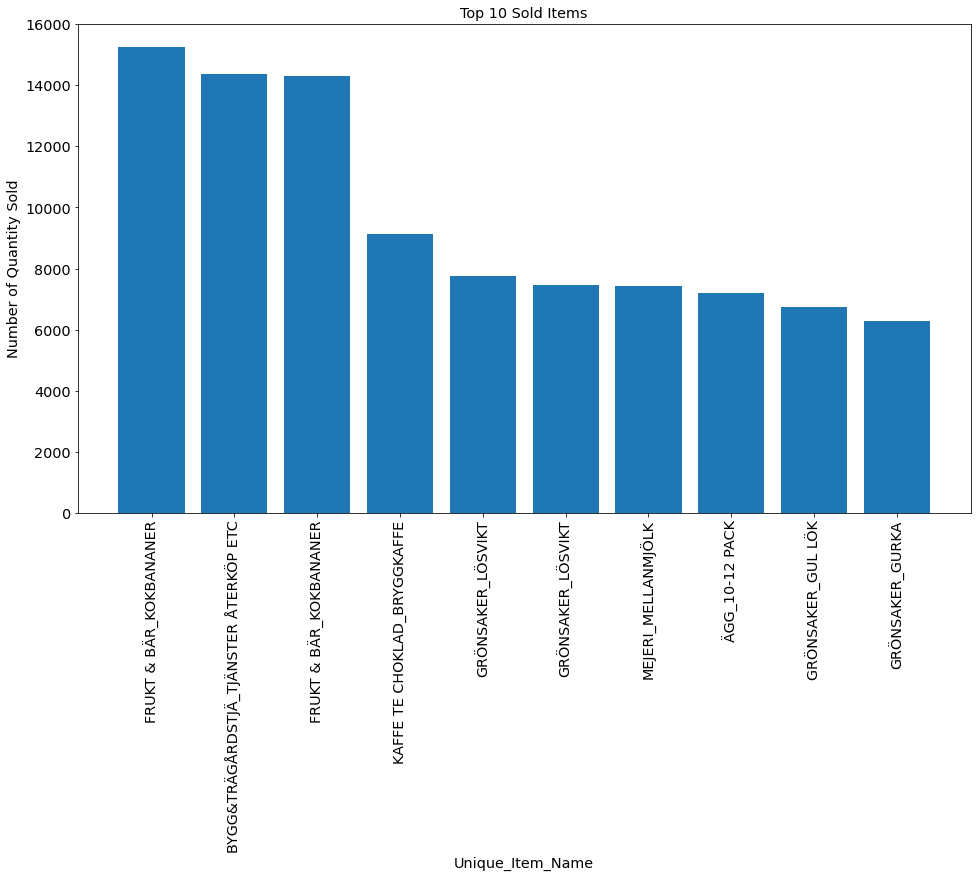

In [19]:
## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height)

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Unique_Item_Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees

# Show graph
plt.show()


## Apriori Algorithm

#### Get the Rules Object

In [20]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 4) ## Model Creation


In [21]:
results = list(rules) ## Storing results in list format for better visualisation

In [22]:
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [23]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,1122,1146,0.002465,0.128512,3.911191
1,1122,1516,0.002017,0.105146,3.673663
2,1122,1656,0.002587,0.134910,4.363807
3,1122,1680,0.003308,0.172462,4.222475
4,1122,10087,0.004897,0.255355,3.384853
...,...,...,...,...,...
292,276012,279105,0.002363,0.089567,5.712500
293,61818,62104,0.002214,0.118369,11.574180
294,61858,61960,0.002278,0.113323,10.557599
295,61858,62132,0.002139,0.106423,9.836525


#### Map To Unique Names

In [24]:
results_df_names = resultsinDataFrame.merge(hash_map_series, left_on='Left Hand Side', right_on='ItemID')
results_df_names = results_df_names.merge(hash_map_series, left_on='Right Hand Side', right_on='ItemID')

results_df_names

,Left Hand Side,Right Hand Side,Support,Confidence,Lift,Unique_Item_Name_x,Unique_Item_Name_y
0,1122,1146,0.002465,0.128512,3.911191,FRUKT & BÄR_CITRONER,GRÖNSAKER_GURKA
1,1122,1516,0.002017,0.105146,3.673663,FRUKT & BÄR_CITRONER,FRUKT & BÄR_APELSINER
2,1146,1516,0.003110,0.094658,3.307233,GRÖNSAKER_GURKA,FRUKT & BÄR_APELSINER
3,1122,1656,0.002587,0.134910,4.363807,FRUKT & BÄR_CITRONER,GRÖNSAKER_GUL LÖK
4,1146,1656,0.004609,0.140283,4.537601,GRÖNSAKER_GURKA,GRÖNSAKER_GUL LÖK
...,...,...,...,...,...,...,...
292,276012,303439,0.002166,0.082087,3.215631,ÄGG_20 PACK ELLER STÖRRE,MEJERI_MELLANMJÖLK
293,300082,303439,0.002491,0.084817,3.322576,KAFFE TE CHOKLAD_BRYGGKAFFE,MEJERI_MELLANMJÖLK
294,276423,498883,0.002262,0.161339,18.098402,TISSUE PAPPER_STANDARD,TISSUE PAPPER_STANDARD
295,300082,303408,0.002278,0.077552,3.749489,KAFFE TE CHOKLAD_BRYGGKAFFE,MEJERI_STANDARDMJÖLK


## Multivariate rules

In [25]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


In [49]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)


In [50]:
#list_most_IDs = data_subset_sub.groupby(by = "ItemID").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False)

In [51]:
frequent_itemsets

,support,itemsets
0,0.014527,(234)
1,0.040844,(1680)
2,0.030916,(1656)
3,0.026386,(276012)
4,0.025527,(303439)
...,...,...
97,0.010659,"(62104, 46877)"
98,0.010819,"(62132, 64582)"
99,0.010734,"(61960, 64582)"
100,0.022887,"(46877, 64582)"


In [57]:
from mlxtend.frequent_patterns import association_rules

df_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1680),(10087),0.040844,0.075440,0.010974,0.268678,3.561463,0.007893,1.264231
1,(10087),(1680),0.075440,0.040844,0.010974,0.145464,3.561463,0.007893,1.122429
2,(62104),(64582),0.035669,0.080322,0.010227,0.286719,3.569623,0.007362,1.289362
3,(64582),(62104),0.080322,0.035669,0.010227,0.127325,3.569623,0.007362,1.105028
4,(62104),(46877),0.035669,0.076742,0.010659,0.298833,3.893995,0.007922,1.316745
5,(46877),(62104),0.076742,0.035669,0.010659,0.138895,3.893995,0.007922,1.119876
6,(62132),(64582),0.038859,0.080322,0.010819,0.278418,3.466288,0.007698,1.274531
7,(64582),(62132),0.080322,0.038859,0.010819,0.134697,3.466288,0.007698,1.110757
8,(61960),(64582),0.029192,0.080322,0.010734,0.367690,4.577712,0.008389,1.454474
9,(64582),(61960),0.080322,0.029192,0.010734,0.133634,4.577712,0.008389,1.120552


In [63]:
df_association_rules['antecedents_name'] = df_association_rules['antecedents'].apply(lambda x: [hash_map_series.loc[i] for i in x])

df_association_rules['consequents_name'] = df_association_rules['consequents'].apply(lambda x: [hash_map_series.loc[i] for i in x])

In [64]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_name,consequents_name
0,(1680),(10087),0.040844,0.075440,0.010974,0.268678,3.561463,0.007893,1.264231,[[GRÖNSAKER_LÖSVIKT]],[[FRUKT & BÄR_KOKBANANER]]
1,(10087),(1680),0.075440,0.040844,0.010974,0.145464,3.561463,0.007893,1.122429,[[FRUKT & BÄR_KOKBANANER]],[[GRÖNSAKER_LÖSVIKT]]
2,(62104),(64582),0.035669,0.080322,0.010227,0.286719,3.569623,0.007362,1.289362,[[GRÖNSAKER_GUL LÖK]],[[FRUKT & BÄR_KOKBANANER]]
3,(64582),(62104),0.080322,0.035669,0.010227,0.127325,3.569623,0.007362,1.105028,[[FRUKT & BÄR_KOKBANANER]],[[GRÖNSAKER_GUL LÖK]]
4,(62104),(46877),0.035669,0.076742,0.010659,0.298833,3.893995,0.007922,1.316745,[[GRÖNSAKER_GUL LÖK]],[[BYGG&TRÄGÅRDSTJÄ_TJÄNSTER ÅTERKÖP ETC]]
5,(46877),(62104),0.076742,0.035669,0.010659,0.138895,3.893995,0.007922,1.119876,[[BYGG&TRÄGÅRDSTJÄ_TJÄNSTER ÅTERKÖP ETC]],[[GRÖNSAKER_GUL LÖK]]
6,(62132),(64582),0.038859,0.080322,0.010819,0.278418,3.466288,0.007698,1.274531,[[GRÖNSAKER_LÖSVIKT]],[[FRUKT & BÄR_KOKBANANER]]
7,(64582),(62132),0.080322,0.038859,0.010819,0.134697,3.466288,0.007698,1.110757,[[FRUKT & BÄR_KOKBANANER]],[[GRÖNSAKER_LÖSVIKT]]
8,(61960),(64582),0.029192,0.080322,0.010734,0.367690,4.577712,0.008389,1.454474,[[FRUKT & BÄR_APELSINER]],[[FRUKT & BÄR_KOKBANANER]]
9,(64582),(61960),0.080322,0.029192,0.010734,0.133634,4.577712,0.008389,1.120552,[[FRUKT & BÄR_KOKBANANER]],[[FRUKT & BÄR_APELSINER]]


In [48]:
#list_most_tenth = list_most_IDs.iloc[:int(len(list_most_IDs)/10),0].to_list()